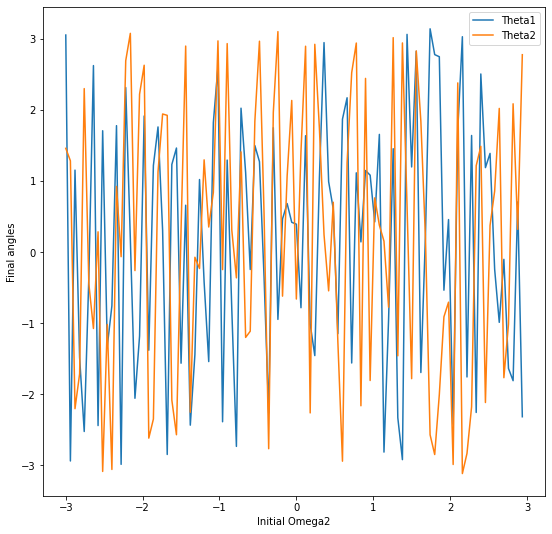

In [ ]:
# Double pendulum, interesting plots 
from numpy import arange,array,sin,cos,pi
from matplotlib.pyplot import plot,show,legend,figure,xlabel,ylabel

# Function f(r)
def f(r,l):
  g = 9.81
  theta1 = r[0]
  theta2 = r[1]
  omega1 = r[2]
  omega2 = r[3]
  ftheta1 = omega1
  ftheta2 = omega2
  fomega1 = -(omega1*omega1*sin(2*theta1-2*theta2) + 2*omega2*omega2*sin(theta1-theta2) + (3*sin(theta1) + sin(theta1-2*theta2))*g/l)/(3-cos(2*theta1-2*theta2))
  fomega2 = (4*omega1*omega1*sin(theta1-theta2) + omega2*omega2*sin(2*theta1-2*theta2) - 2*(sin(theta2)-sin(2*theta1-theta2))*g/l)/(3-cos(2*theta1-2*theta2))
  return array([ftheta1,ftheta2,fomega1,fomega2],float)


# Main Program from arbitrary starting values
def runDoublePendulum(theta1,theta2,omega1,omega2,tf=5.,nstep=3000000,l = 0.4):
  t = 0
  h = (tf-t)/nstep
  r = array([theta1,theta2,omega1,omega2])
  thetas_1 = []
  thetas_2 = []
  omegas_1 = []
  omegas_2 = []

  # Main loop
  while t < tf:
    thetas_1.append(r[0])
    thetas_2.append(r[1])
    omegas_1.append(r[2])
    omegas_2.append(r[3])

    k1 = h*f(r,l)
    k2 = h*f(r+0.5*k1,l)
    k3 = h*f(r+0.5*k2,l)
    k4 = h*f(r+k3,l)
    r += (k1+2*k2+2*k3+k4)/6
  
    # Update
    t += h
  return (thetas_1, thetas_2, omegas_1, omegas_2)

theta1_init = 2.0
theta2_init = 2.0
omega1_init = 0.3

omega2_init_a = -3.0
omega2_init_b = 3.0
nomega2 = 100

step = (omega2_init_b - omega2_init_a)/nomega2
omegas2s_init = arange(omega2_init_a,omega2_init_b,step)
theta1_fs = []
theta2_fs = []

for omega2_init in omegas2s_init:
  thetas_1, thetas_2, omegas_1, omegas_2 = runDoublePendulum(theta1_init, theta2_init, omega1_init, omega2_init, 50, 500000)

  f_theta1 = thetas_1[-1]
  f_theta2 = thetas_2[-1]

  ### fix values so we're not sensitive to 2pi wrap
  while (f_theta1 < -pi): f_theta1 += pi
  while (f_theta2 < -pi): f_theta2 += pi
  while (f_theta1 > pi): f_theta1 -= pi
  while (f_theta2 > pi): f_theta2 -= pi
  theta1_fs.append(f_theta1)
  theta2_fs.append(f_theta2)

figure(figsize=(9,9))

plot(omegas2s_init,theta1_fs,label="Theta1")
plot(omegas2s_init,theta2_fs,label="Theta2")
xlabel("Initial Omega2")
ylabel("Final angles")
legend()
show() ### whoa, that is chaotic! huge changes based on tiny differences in initial conditions. Very cool though

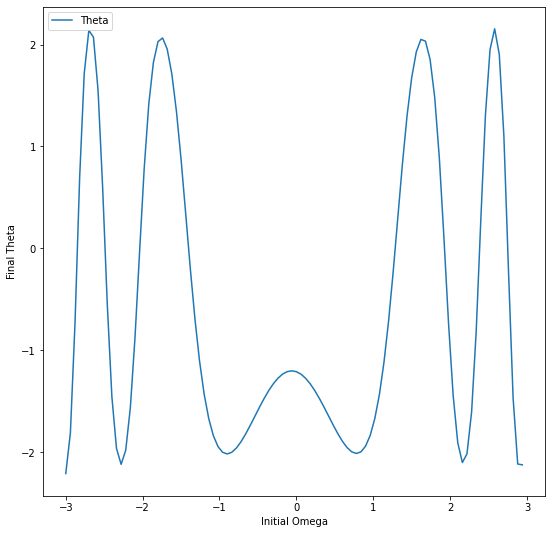

In [ ]:
# Single non-linear pendulum, similar interesting plots 
from numpy import arange,array,sin,cos,pi
from matplotlib.pyplot import plot,show,legend,figure,xlabel,ylabel

# Function f(r)
def f(r,l):
  g = 9.81
  theta = r[0]
  omega = r[1]
  ftheta = omega
  fomega = (-g/l)*sin(theta)
  return array([ftheta,fomega],float)

# Main Program from arbitrary starting values
def runNonLinearPendulum(theta,omega,tf=5.,nstep=3000000,l = 0.4):
  t = 0
  h = (tf-t)/nstep
  r = array([theta,omega])
  thetas = []
  omegas = []

  # Main loop
  while t < tf:
    thetas.append(r[0])
    omegas.append(r[1])

    k1 = h*f(r,l)
    k2 = h*f(r+0.5*k1,l)
    k3 = h*f(r+0.5*k2,l)
    k4 = h*f(r+k3,l)
    r += (k1+2*k2+2*k3+k4)/6
  
    # Update
    t += h
  return (thetas, omegas)

theta_init = 2.0

omega_init_a = -3.0
omega_init_b = 3.0
nomega = 100

step = (omega_init_b - omega_init_a)/nomega
omegas_init = arange(omega_init_a,omega_init_b,step)
theta_fs = []

for omega_init in omegas_init:
  thetas, omegas = runNonLinearPendulum(theta_init, omega_init, 50, 100000)

  f_theta = thetas[-1]

  ### fix values so we're not sensitive to 2pi wrap
  while (f_theta < -pi): f_theta += pi
  while (f_theta > pi): f_theta -= pi
  theta_fs.append(f_theta)

figure(figsize=(9,9))

plot(omegas_init,theta_fs,label="Theta")
xlabel("Initial Omega")
ylabel("Final Theta")
legend()
show() ### this, however, is super smooth. Not as simple as the linear pendulum, but not chaotic!

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from numpy.random import default_rng

# installation and setup of parton package, and mount drive
!pip install parton
from parton import mkPDF
from google.colab import drive
drive.mount('/content/drive')

# function from Sal to get electric charged, number of colors and 3rd component of weak isospin                    
def getQ_T3_NC(pdgID):
  q = 0 ## electric charge in units of e
  t3 = 0 ## t3  weak isospin
  nc = 1 ## number of colors
  if abs(pdgID) < 7: nc = 3
  if (pdgID == 2 or pdgID == 4 or pdgID == 6): ## up type quark
      q = 2./3
      t3 = 0.5
  elif (pdgID == -2 or pdgID == -4 or pdgID == -6): ## up type anti-quark
      q = -2./3
      t3 = -0.5
  elif (pdgID == 1 or pdgID == 3 or pdgID == 5): ## down type quark
      q = -1./3
      t3 = -0.5
  elif (pdgID == -1 or pdgID == -3 or pdgID == -5): ## down type anti0quark
      q = 1./3
      t3 = 0.5
  elif (pdgID == 11 or pdgID == 13 or pdgID == 15): ## charged lep
      q = -1.0
      t3 = -0.5
  elif (pdgID == -11 or pdgID == -13 or pdgID == -15): ## charged anti-lep
      q = 1.0
      t3 = 0.5
  elif (pdgID == 12 or pdgID == 14 or pdgID == 16): ## neutrino
      q = 0.0
      t3 = 0.5
  elif (pdgID == -12 or pdgID == -14 or pdgID == -16): ## anti neutrino
      q = 0.0
      t3 = -0.5
  return q,t3,nc


# now define a bunch of things
rng = default_rng() # for random numbers
pdf = mkPDF('CT10', 0,pdfdir='/content/drive/My Drive/') # to get PDFs!
q2=100.*100. ## 100^2 GeV^2 
ebeam_cm = 13e3 ### 13 TeV = 13e3 GeV

dcosTheta = 0.05 ### binning for dcostheta
cosThetas = np.arange(-1,1,dcosTheta)

MZ = 91.1876;      # GeV
GF = 1.1663787e-5; # 1/GeV^2
sin2ThetaW = 0.23126; # unitless
Gamma_Z = 2.4952; # GeV

c2 = 8*GF*MZ*MZ / np.sqrt(2); ## coupling constant (with some other factors)

dsigmas = np.zeros(cosThetas.size)

q_o1,t3_o1,nc_o1 = getQ_T3_NC(11) ## electron
Le =  ( t3_o1-sin2ThetaW*q_o1);
Re = -1*(sin2ThetaW*q_o1);

pi2 = np.pi*np.pi
mz2 = MZ*MZ

convert_InvGeVGeV = 0.0003891 ### Converts GeV^-2 to barns

pdgs = [1,2,3,4,5,-1,-2,-3,-4,-5]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for parton: filename=parton-0.2-py3-none-any.whl size=12968 sha256=8fa18654fe6babd7eeb002135c7278f53bd60a956f931a596c4c9d44a256c530
  Stored in directory: /root/.cache/pip/wheels/20/b2/4f/4391a56422563191704354406ee27988eff7d288cfb20dfe4c
Successfully built parton
Mounted at /content/drive


Doing flavor =  1
Doing flavor =  2
Doing flavor =  3
Doing flavor =  4
Doing flavor =  5


Text(0, 0.5, 'q bin')

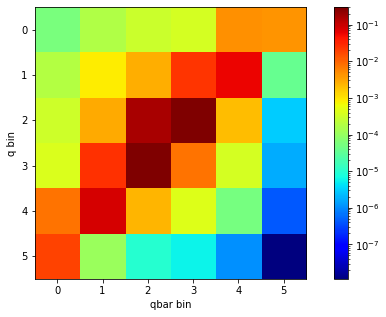

In [ ]:
### Small importance sampling study! Run this to figure out how to sample for the larger distribution

### Want to study how much of this comes from each of the 5 q+qbar pairs so we can improve our integration
### Note that cos(theta) terms change for different quarks but have no x/cm dependence! 
### So probably cos(theta) can be ignored to 1st order here for integration tests
### As for x, study in 6 bins of x for each (36 bins for q*qbar)
### Similarly, let's not separate out by flavor. Just to make this easier! It doesn't have to be perfect!

import matplotlib.cm as cm
from matplotlib import colors

nflavor = 5
xs = np.array([0.000001, 0.001, 0.005, 0.0075, 0.01, 0.05, 1.0]) #can be fine-tuned
nx = len(xs)-1 ### because we want only the points in between bins

vals = np.zeros([nx,nx])  ### q+qbar flavor, x for quark, x for qbar

# we could make binning adaptive, we won't do that, however
nper=10000 ### can study if this needs to be bigger, again this is just to define binning

for flavor in range(1,nflavor+1): ### quark numbering starts with 1
   print("Doing flavor = ",flavor)
   for iqx in range(nx): ## quark
     xqlow = xs[iqx]
     xqhigh = xs[iqx+1]
     q_i1,t3_i1,nc_i1 = getQ_T3_NC(flavor) ## quark
     L = t3_i1-sin2ThetaW*q_i1
     R = -1*(sin2ThetaW*q_i1)
     for iqbarx in range(nx): ### anti-quark
       xqbarlow = xs[iqbarx]
       xqbarhigh = xs[iqbarx+1]
       for i in range(nper):
         cosTheta = rng.uniform(-1,1) ### random over full range
         randxq = rng.uniform(xqlow,xqhigh)
         randxqbar = rng.uniform(xqbarlow,xqbarhigh)
         pdf1 = pdf.xfxQ2(flavor, randxq, q2)
         pdf2 = pdf.xfxQ2(-flavor, randxqbar, q2)
         ### pdf probability should be proportional to the two PDFs above
         totalpdf = pdf1*pdf2

         ### assume no perpendicular motion and each proton carrying energy ebeam_cm / 2
         ### also, partons are massless given these energies, so |\vec{p}| = E
         ### then p1 = (0,0,-kx1, kx1) and p2 = (0,0,kx2,kx2) where k = ebeam_cm / 2
         ### then (p1+p2) = (0,0,k(x2-x1),k(x2+x1)) and s = (p1+p2)^2 = k^2[(x2+x1)^2 - (x2-x1)^2] = 4k^2x1x2
         ### And k^2 = ebeam_cm^2/4 so s = x1*x2*ebeam_cm^2
         s = randxq*randxqbar*ebeam_cm*ebeam_cm
         vals[iqx][iqbarx] += pdf1*pdf2*(nc_o1 /  nc_i1 ) * (s / ( 256. * pi2) ) / ( pow( s-mz2, 2.0) + s*Gamma_Z*Gamma_Z) * \
          c2*c2* ( (L*L+R*R)*(Le*Le+Re*Re)*(1+cosTheta*cosTheta) + (L*L-R*R)*(Le*Le-Re*Re)*2*cosTheta ) 

### normalize everything
sum = np.sum(vals)
vals /= (sum)
#plot it!
fig = plt.figure(figsize=(10,5))
im = plt.imshow(vals,cmap = plt.get_cmap('jet'),norm=colors.LogNorm())
plt.colorbar(im)
plt.xlabel("qbar bin")
plt.ylabel("q bin")


Using probabilities =  [5.84507602e-05 1.80628009e-04 2.95404609e-04 3.71173887e-04
 4.66488004e-03 4.31233405e-03 1.90840119e-04 8.83870324e-04
 2.84672095e-03 2.53719830e-02 5.87147458e-02 3.84901217e-05
 3.24242101e-04 2.97419836e-03 1.56913891e-01 2.90259926e-01
 2.07609566e-03 3.03494179e-06 4.27105806e-04 2.58260096e-02
 3.04957962e-01 7.97928299e-03 3.82257840e-04 1.79913887e-06
 8.06196807e-03 8.03950976e-02 2.36648749e-03 4.41953738e-04
 5.43066148e-05 0.00000000e+00 1.84943188e-02 1.13393413e-04
 1.01603882e-05 5.86213996e-06 1.12510011e-06 0.00000000e+00] with sum =  1.0
costheta =  -1.0 flavor = 1
costheta =  -1.0 flavor = 2
costheta =  -1.0 flavor = 3
costheta =  -1.0 flavor = 4
costheta =  -1.0 flavor = 5
costheta =  -0.95 flavor = 1
costheta =  -0.95 flavor = 2
costheta =  -0.95 flavor = 3
costheta =  -0.95 flavor = 4
costheta =  -0.95 flavor = 5
costheta =  -0.8999999999999999 flavor = 1
costheta =  -0.8999999999999999 flavor = 2
costheta =  -0.8999999999999999 flavor =

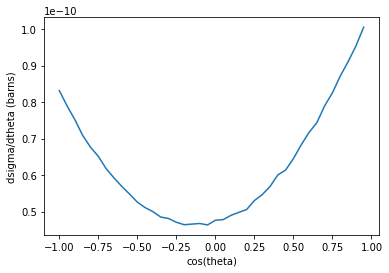

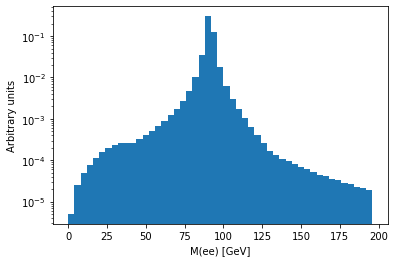

In [ ]:
# final solution to pp->Z->ee with adaptive binning

n=80000  # big but not huge
total = 0 ## total xs, start with 0

### First zero out very low probability bins, otherwise this could cause spikes (even if unlikely), not strictly necessary
TOLERANCE = 1e-6
vals = np.where(vals < TOLERANCE, 0, vals)

probs = np.reshape(vals,(-1)) ### this is an unfolded 1D array! makes it easier to use tools to randomly select from it

### normalize the probabilities again! (after zeroing out bins)
sum = np.sum(probs)
probs /= sum
print("Using probabilities = ",probs, "with sum = ",np.sum(probs))

dsigmas = np.zeros(cosThetas.size) ### zero this out

mees = [] # sqrt(s) values for collision
weights = [] # weights for each of the sqrt(s) values

for icosTheta,cosTheta in enumerate(cosThetas):
   dsigma_domega = 0
   for flavor in pdgs:
        if (flavor < 0): continue ### don't duplicate antiparticles
        print("costheta = ",cosTheta,"flavor =",flavor)
        q_i1,t3_i1,nc_i1 = getQ_T3_NC(flavor) ## quark
        L = t3_i1-sin2ThetaW*q_i1; 
        R = -1*(sin2ThetaW*q_i1);
        bins = rng.choice(np.arange(nx*nx), n, p=probs) ### nx*nx because it's unfolded 2d distribution
        for i in range(n): ### loop over the trials
          qbin = bins[i]//nx ### bin on one axis from unfolded
          qbarbin = bins[i]%nx ### other axis bins
          randx1 = rng.uniform(xs[qbin],xs[qbin+1]) ### within each bin pick a random value
          randx2 = rng.uniform(xs[qbarbin],xs[qbarbin+1])  ### within each bin pick a random value
          pdf1 = pdf.xfxQ2(flavor, randx1, q2) 
          pdf2 = pdf.xfxQ2(-flavor, randx2, q2)
          ### we must divide by our probability to correctly account for our importance sampling
          pdfWeight = pdf1*pdf2/(vals[qbin][qbarbin])

          if (vals[qbin][qbarbin] < TOLERANCE): ### ERROR CHECK! Could remove for speed, shouldn't matter much
            print("JAAA problem in ",qbin,qbarbin, "val = ",vals[qbin][qbarbin] )

          ### assume no perpendicular motion and each proton carrying energy ebeam_cm / 2
          ### also, partons are massless given these energies, so |\vec{p}| = E
          ### then p1 = (0,0,-kx1, kx1) and p2 = (0,0,kx2,kx2) where k = ebeam_cm / 2
          ### then (p1+p2) = (0,0,k(x2-x1),k(x2+x1)) and s = (p1+p2)^2 = k^2[(x2+x1)^2 - (x2-x1)^2] = 4k^2x1x2
          ### And k^2 = ebeam_cm^2/4 so s = ecm = x1*x2*ebeam_cm^2
          s = randx1*randx2*ebeam_cm*ebeam_cm
          thisVal = pdfWeight*((nc_o1 /  nc_i1 ) * (s / ( 256. * pi2) ) / ( pow( s-mz2, 2.0) + s*Gamma_Z*Gamma_Z) ) * \
                            c2*c2* ( (L*L+R*R)*(Le*Le+Re*Re)*(1+cosTheta*cosTheta) + (L*L-R*R)*(Le*Le-Re*Re)*2*cosTheta )           

          dsigma_domega += thisVal
          mees.append(np.sqrt(s))
          weights.append(thisVal)
   dsigmas[icosTheta] = convert_InvGeVGeV*dsigma_domega/ n
   total += dsigmas[icosTheta] * dcosTheta

### why is xs off by 1 order of magnitude? A few reason: 1) This is leading order, so just first order in expansion
### It also has no jets at all, which can be important at the LHC. 
### In addition, we also ignored all photon-mediated diagrams, which can be important away from the Z boson mass
### Finally, we have assumed that there is no perpendicular motion for the Z boson, which is only an approximation
### So, given the above, 1 order of mangitude isn't bad

### table 1 of ATL-PHYS-PUB-2017-006 xs = 1.9 nb for e+e- or mu+mu-, so should be 0.95 nb for e+e-
### also same for https://arxiv.org/pdf/1603.09222.pdf, see table 3

print("total xs (barns) = ",total) 
plt.clf()
plt.plot(cosThetas,dsigmas)
plt.xlabel("cos(theta)")
plt.ylabel("dsigma/dtheta (barns)") ### nicely smooth!
plt.show()

plt.hist(mees,weights=weights,bins=np.arange(0,200,4))
plt.xlabel("M(ee) [GeV]") ### big asymmetry!!! low-values are preferred
plt.ylabel("Arbitrary units")
plt.yscale("log")
plt.show()